# Программирование для всех<br>(основы работы с Python)

*Алла Тамбовцева*

## Практикум 9. Датафреймы Pandas – часть 2

Содержание:

* Еще немного о загрузке данных: аргумент `usecols`
* Сортировка строк датафрейма
* Описание данных: числовые столбцы
* Добавление новых столбцов в датафрейм
* Формат дата-время и добавление новых столбцов
* Описание данных: текстовые столбцы

### Еще немного о загрузке данных: аргумент `usecols`

Импортируем библиотеку `pandas`:

In [1]:
import pandas as pd

Загружаем данные из файла `nplus1_2025.csv`:

In [2]:
df = pd.read_csv("nplus1_2025.csv")
df.head()

,Unnamed: 0,title,author,date,diffc,rubrics,text
0,0,Температуру ядра Земли уточнили с помощью лазе...,Егор Конюхов,2025-01-03,2.9,"Физика, Геология",Физики уточнили температуру внутренней границы...
1,1,Большинство людей эпохи мезолита из Оленеостро...,Михаил Подрезов,2025-01-03,3.1,"Археология, Антропология",Ученые проанализировали изотопный состав строн...
2,2,Физики разобрались в состоянии покоя ткани. Он...,Егор Конюхов,2025-01-03,2.3,Физика,"Группа физиков выяснила, что при отсутствии вн..."
3,3,Виноградины усилили микроволновое поле и помог...,Егор Конюхов,2025-01-06,4.1,Физика,Физики использовали две виноградины для усилен...
4,4,Прием глюкокортикоидов при беременности повыси...,Олег Лищук,2025-01-06,1.2,"Медицина, Психология",Кристина Лаугесен (Kristina Laugesen) из Орхус...


Чтобы не удалять столбец `Unnamed: 0` (и вообще все подобные столбцы, если их будет несколько), при загрузке данных его можно просто исключить.

У функции `read_csv()` есть аргумент `usecols`, в котором можно перечислить столбцы, которые мы хотим оставить в датафрейме при загрузке данных из CSV-файла. Однако перечислять все нужные столбцы, особенно если файл большой, странная затея. Как быть? Воспользоваться тем, что в `usecols` можно указывать не только перечени, но и функции, которые возвращают `True` и `False` в ответ на названия столбцов.

> Напишите lambda-функцию, которая принимает на вход название столбца (обычную строку с текстом) и возвращает значение `False`, если оно начинается с `Unnamed`, и `True` – иначе. Впишите эту функцию в `usecols` и загрузите данные в датафрейм еще раз.

In [3]:
# сама функция, пишем, но не применяем

lambda x: not x.startswith("Unnamed")

<function __main__.<lambda>(x)>

In [4]:
# подставляем ее в usecols

df = pd.read_csv("nplus1_2025.csv", 
                 usecols = lambda x: not x.startswith("Unnamed"))
df.head()

,title,author,date,diffc,rubrics,text
0,Температуру ядра Земли уточнили с помощью лазе...,Егор Конюхов,2025-01-03,2.9,"Физика, Геология",Физики уточнили температуру внутренней границы...
1,Большинство людей эпохи мезолита из Оленеостро...,Михаил Подрезов,2025-01-03,3.1,"Археология, Антропология",Ученые проанализировали изотопный состав строн...
2,Физики разобрались в состоянии покоя ткани. Он...,Егор Конюхов,2025-01-03,2.3,Физика,"Группа физиков выяснила, что при отсутствии вн..."
3,Виноградины усилили микроволновое поле и помог...,Егор Конюхов,2025-01-06,4.1,Физика,Физики использовали две виноградины для усилен...
4,Прием глюкокортикоидов при беременности повыси...,Олег Лищук,2025-01-06,1.2,"Медицина, Психология",Кристина Лаугесен (Kristina Laugesen) из Орхус...


### Сортировка строк датафрейма

Для сортировки строк на датафрейме определен метод `.sort_values()`, в нем можно указать основание сортировки – название столбца или столбцов, по которым производится упорядочение.

In [5]:
df.sort_values("diffc")

,title,author,date,diffc,rubrics,text
1512,Число жертв вспышки лихорадки Эбола в Конго до...,Олег Лищук,2025-09-26,1.1,Медицина,Масштабы вспышки лихорадки Эбола в Демократиче...
626,В Штутгарте раскопали около сотни захоронений ...,Михаил Подрезов,2025-04-21,1.1,Археология,Немецкие археологи раскопали в Штутгарте очень...
625,Более четверти переболевших острым ковидом сто...,Олег Лищук,2025-04-21,1.1,Медицина,Два исследования с анализом данных из 14 стран...
52,Неоптимальная температура в доме помешала пожи...,Олег Лищук,2025-01-14,1.1,"Экология и климат, Психология, Медицина",Амир Баниассади (Amir Baniassadi) из Гарвардск...
989,Синий экран смерти Windows почернеет. Microsof...,Андрей Фокин,2025-06-27,1.1,IT,Microsoft изменит вид знаменитого синего экран...
...,...,...,...,...,...,...
1527,Химики получили <i>Z</i>-алкены из терминальны...,Михаил Бойм,2025-09-29,8.3,Химия,Химики из США разработали метод селективного с...
439,Радикальное кросс-сочетание прошло энантиоспец...,Михаил Бойм,2025-03-21,8.5,Химия,"Химики из США обнаружили, что радикальное крос..."
1304,Органический радикал нарушил правило Каши. И п...,Михаил Бойм,2025-08-19,8.6,Химия,"Химики из Швейцарии обнаружили, что анион-ради..."
931,Окислительное присоединение на палладии прошло...,Михаил Бойм,2025-06-18,9.1,Химия,Давно принятое научным сообществом представлен...


По умолчанию сортировка выполняется по возрастанию, если нужно убывание – необходим аргумент `ascending = False`:

In [6]:
df.sort_values("diffc", ascending = False)

,title,author,date,diffc,rubrics,text
931,Окислительное присоединение на палладии прошло...,Михаил Бойм,2025-06-18,9.1,Химия,Давно принятое научным сообществом представлен...
466,Премию Абеля присудили за вклад в алгебраическ...,Михаил Бойм,2025-03-26,9.1,Математика,Лауреатом премии Абеля 2025 года стал Масаки К...
1304,Органический радикал нарушил правило Каши. И п...,Михаил Бойм,2025-08-19,8.6,Химия,"Химики из Швейцарии обнаружили, что анион-ради..."
439,Радикальное кросс-сочетание прошло энантиоспец...,Михаил Бойм,2025-03-21,8.5,Химия,"Химики из США обнаружили, что радикальное крос..."
1527,Химики получили <i>Z</i>-алкены из терминальны...,Михаил Бойм,2025-09-29,8.3,Химия,Химики из США разработали метод селективного с...
...,...,...,...,...,...,...
52,Неоптимальная температура в доме помешала пожи...,Олег Лищук,2025-01-14,1.1,"Экология и климат, Психология, Медицина",Амир Баниассади (Amir Baniassadi) из Гарвардск...
499,Англия сделала бесплатной экстренную контрацеп...,Олег Лищук,2025-03-31,1.1,"Социология, Медицина",Британское правительство приняло решение сдела...
1439,Число заболевших лихорадкой Эбола в Конго боле...,Олег Лищук,2025-09-12,1.1,Медицина,Число случаев подозрения на лихорадку Эбола в ...
61,Запрет на рекламу и спонсорство табака снизил ...,Олег Лищук,2025-01-15,1.1,"Социология, Психология, Медицина",Кристина Саад (Christina Saad) с коллегами по ...


Для текстовых столбцов сортировка производится по алфавиту:

In [7]:
df.sort_values("author")

,title,author,date,diffc,rubrics,text
298,Intuitive Machines отправила к Луне второй пос...,Александр Войтюк,2025-02-27,3.9,Космонавтика,Ночью 27 февраля 2025 года состоялся успешный ...
1376,«Джеймс Уэбб» не заметил двух экзопланет у Эпс...,Александр Войтюк,2025-09-02,4.2,Астрономия,Инфракрасный космический телескоп «Джеймс Уэбб...
1375,«Хаббл» увидел пару из белого карлика и голубо...,Александр Войтюк,2025-09-02,4.6,Астрономия,Астрономы при помощи космического телескопа «Х...
1374,Космический «Бигфут» оказался далеким массивны...,Александр Войтюк,2025-09-02,4.7,Астрономия,Инфракрасный космический телескоп «Джеймс Уэбб...
506,«Джеймс Уэбб» сфотографировал кольцо Эйнштейна...,Александр Войтюк,2025-04-01,1.9,Астрономия,Инфракрасный космический телескоп «Джеймс Уэбб...
...,...,...,...,...,...,...
347,Качество спермы связали с продолжительностью ж...,Юлия Нестерова,2025-03-06,3.1,Медицина,Датские ученые под руководством Лерке Прискорн...
248,Антидепрессант флуоксетин оказался мощным имму...,Юлия Нестерова,2025-02-19,4.5,Медицина,"Американские ученые объяснили, каким образом п..."
278,Кошки заразились от хозяев птичьим гриппом и у...,Юлия Нестерова,2025-02-25,2.7,Медицина,Эксперты из Центров по контролю и профилактике...
256,Развод родителей связали с увеличением вероятн...,Юлия Нестерова,2025-02-20,2.8,Медицина,Канадские и американские ученые проанализирова...


**Комментарий.** Почему метод называется `.sort_values()`, а не просто `.sort()`? В `pandas` есть два метода, `.sort_values()` и `.sort_index()`. Первый выполняет сортировку строк по значениям какого-либо столбца, а второй – по индексам строк. В нашем случае сортировка по индексам вряд ли будет полезна, но если бы на других данных в индексы строк были вынесены, например, названия стран или регионов, мы бы смогли отсортировать строки по алфавиту. Однако и на имеющихся данных метод `.sort_index()` нам может пригодиться, только не для сортировки строк в самом датафрейме, а для сортировки таблицы частот, полученной через `.value_counts()`.

> Подумайте, как отсортировать строки сразу по двум основаниям, например, по автору и сложности. 

In [8]:
# названия столбцов – в виде списка

df.sort_values(["author", "diffc"])

,title,author,date,diffc,rubrics,text
321,Частный посадочный модуль IM-2 вышел на околол...,Александр Войтюк,2025-03-03,1.9,Космонавтика,Лунный модуль IM-2 компании Intuitive Machines...
323,Капсула второго частного фармацевтического спу...,Александр Войтюк,2025-03-03,1.9,Космонавтика,Возвращаемая капсула спутника W-Series 2 амери...
344,Тяжелая ракета «Ариан-6» совершила первый комм...,Александр Войтюк,2025-03-06,1.9,Космонавтика,Вечером 6 марта 2025 года с космодрома Куру со...
363,Частный луноход MAPP пережил высадку на Луну. ...,Александр Войтюк,2025-03-07,1.9,Космонавтика,Луноход MAPP компании Lunar Outpost и эксперим...
435,Первый экипаж корабля Starliner вернулся на Зе...,Александр Войтюк,2025-03-20,1.9,Космонавтика,Возвращаемая капсула космического корабля Crew...
...,...,...,...,...,...,...
37,Детский стресс повлиял на метилирование ДНК в ...,Юлия Нестерова,2025-01-13,5.7,"Медицина, Биология",Ученые из Финляндии и Дании сравнили результат...
198,Нейростимуляция улучшила работу мотонейронов у...,Юлия Нестерова,2025-02-11,5.7,Медицина,Американские ученые улучшили работу мотонейрон...
226,Хронический стресс ухудшил слух мышей. Они ста...,Юлия Нестерова,2025-02-17,5.7,Медицина,"Израильские ученые обнаружили, что у мышей под..."
145,Депрессия генетически повысила риск развития с...,Юлия Нестерова,2025-01-31,6.2,Медицина,"Ученые из России, Китая и США обнаружили, что ..."


**Комментарий.** Сначала производится сортировка по имени автора, затем – если автор одинаковый, производится сортировка по сложности новости. В данном случае авторы упорядочены по алфавиту, от А до Я, а в рамках каждого автора новости упорядочены по возрастанию сложности. В таблице выше в начале таблицы новости одного и того же автора и одинаковой сложности, поэтому не очень понятно, как сработала сортировка, однако можно посмотреть на последние строки. Последние 5 новостей принадлежат одному автору Юлии Нестеровой, но сложность у новостей разная, сначала идут новости со сложностью 5.7, затем – со значениями 6.2 и 7.2.

Если мы поменяем местами основания сортировки, результат будет иным:

In [9]:
df.sort_values(["diffc", "author"])

,title,author,date,diffc,rubrics,text
1161,Список рисков приема агонистов ГПП-1 пополнилс...,Анастасия Кузнецова–Фантони,2025-07-24,1.1,Медицина,FDA обязало производителей агонистов рецепторо...
38,Седьмой испытательный полет Starship перенесли...,Андрей Фокин,2025-01-13,1.1,Космонавтика,SpaceX объявила о переносе даты седьмого испыт...
144,Демонстратор сверхзвукового лайнера XB-1 вперв...,Андрей Фокин,2025-01-30,1.1,Авиация,"Самолет-демонстратор XB-1 «Baby Boom», разрабо..."
217,SpaceX провела самый долгий прожиг второй ступ...,Андрей Фокин,2025-02-13,1.1,Космонавтика,В преддверии восьмого испытательного полета ко...
305,Skype перестанет работать в мае 2025 года. Пол...,Андрей Фокин,2025-02-28,1.1,"IT, Связь",Microsoft планирует окончательно закрыть серви...
...,...,...,...,...,...,...
1527,Химики получили <i>Z</i>-алкены из терминальны...,Михаил Бойм,2025-09-29,8.3,Химия,Химики из США разработали метод селективного с...
439,Радикальное кросс-сочетание прошло энантиоспец...,Михаил Бойм,2025-03-21,8.5,Химия,"Химики из США обнаружили, что радикальное крос..."
1304,Органический радикал нарушил правило Каши. И п...,Михаил Бойм,2025-08-19,8.6,Химия,"Химики из Швейцарии обнаружили, что анион-ради..."
466,Премию Абеля присудили за вклад в алгебраическ...,Михаил Бойм,2025-03-26,9.1,Математика,Лауреатом премии Абеля 2025 года стал Масаки К...


Теперь новости упорядочиваются сначала по сложности, а затем – по имени автора. В начале таблицы находятся самые простые новости, со сложностью 1.1, в конце – самые сложные, со сложностью 9.1. Если сложность у новостей одинакова, сначала идут новости с авторами на А, затем – на Б, и так далее. 

Как быть, если порядок сортировки по разным основаниям должен отличаться? Например, если мы хотим выполнить сортировку по убыванию сложности, а сортировку по имени авторам оставить «алфавитную» (по возрастанию)? В таком случае в уже знакомый аргумент `ascending` нужно добавить список из `True` и `False`:

In [10]:
df.sort_values(["diffc", "author"], ascending = [False, True])

,title,author,date,diffc,rubrics,text
466,Премию Абеля присудили за вклад в алгебраическ...,Михаил Бойм,2025-03-26,9.1,Математика,Лауреатом премии Абеля 2025 года стал Масаки К...
931,Окислительное присоединение на палладии прошло...,Михаил Бойм,2025-06-18,9.1,Химия,Давно принятое научным сообществом представлен...
1304,Органический радикал нарушил правило Каши. И п...,Михаил Бойм,2025-08-19,8.6,Химия,"Химики из Швейцарии обнаружили, что анион-ради..."
439,Радикальное кросс-сочетание прошло энантиоспец...,Михаил Бойм,2025-03-21,8.5,Химия,"Химики из США обнаружили, что радикальное крос..."
1527,Химики получили <i>Z</i>-алкены из терминальны...,Михаил Бойм,2025-09-29,8.3,Химия,Химики из США разработали метод селективного с...
...,...,...,...,...,...,...
1629,Республика Фиджи искоренила трахому. Это ведущ...,Олег Лищук,2025-10-21,1.1,Медицина,Всемирная организация здравоохранения официаль...
1631,В Конго выписали последнего пациента с лихорад...,Олег Лищук,2025-10-21,1.1,Медицина,"Последний пациент, проходивший лечение от лихо..."
1752,Заболеваемость туберкулезом в мире снизилась в...,Олег Лищук,2025-11-14,1.1,Медицина,Всемирная организация здравоохранения выпустил...
1764,"Кабо-Верде, Маврикий и Сейшелы искоренили корь...",Олег Лищук,2025-11-18,1.1,Медицина,Всемирная организация здравоохранения официаль...


### Описание данных: числовые столбцы

Для описания отдельного столбца можно вызвать метод `.describe()`, который используется для описания всего датафрейма:

In [11]:
df["diffc"].describe()

count    1777.000000
mean        2.774226
std         1.337353
min         1.100000
25%         1.800000
50%         2.500000
75%         3.300000
max         9.100000
Name: diffc, dtype: float64

Если нас интересуют описательные статистики по отдельности, их можно вызвать с помощью методов с «говорящими» названиями:

In [12]:
print("Минимум:", df["diffc"].min())
print("Максимум:", df["diffc"].max())
print("Среднее:", df["diffc"].mean())
print("Медиана:", df["diffc"].median())
print("25% процентиль:", df["diffc"].quantile(0.25))
print("75% процентиль:", df["diffc"].quantile(0.75))

Минимум: 1.1
Максимум: 9.1
Среднее: 2.774226223972991
Медиана: 2.5
25% процентиль: 1.8
75% процентиль: 3.3


Можем запросить уникальные значения в столбце:

In [13]:
print(df["diffc"].unique())

[2.9 3.1 2.3 4.1 1.2 2.2 4.8 3.2 4.5 1.9 5.3 3.7 4.3 1.3 3.9 2.8 3.3 2.1
 2.4 1.4 5.7 1.1 3.8 1.6 1.8 1.7 4.9 3.5 4.2 5.5 2.5 1.5 2.6 7.8 5.1 3.4
 5.9 6.2 4.4 2.7 7.1 4.7 5.6 6.5 6.3 7.2 6.1 3.6 8.5 9.1 6.7 5.2 4.6 6.8
 5.4 6.4 7.7 7.5 5.8 8.1 7.9 6.9 8.6 7.4 6.6 7.3 8.3]


Или сразу таблицу частот:

In [14]:
print(df["diffc"].value_counts())

1.9    169
3.1    147
1.2    117
2.1     92
1.4     76
      ... 
8.5      1
7.7      1
6.3      1
7.2      1
8.3      1
Name: diffc, Length: 67, dtype: int64


> Какой недостаток у таблицы частот выше? Как можно более разумным образом получить представление о количестве те или иных значений, предполагая, что сам показатель дробный? Подсказка: вспомните про гистограмму и основную идею этого графика. Постройте гистограмму для сложности новости.

In [15]:
# из-за дробности много уникальных значений,
# надо объединить в более крупные группы,
# сделаем 5 групп для примера

print(df["diffc"].value_counts(bins = 5))

(1.0910000000000002, 2.7]    999
(2.7, 4.3]                   549
(4.3, 5.9]                   176
(5.9, 7.5]                    41
(7.5, 9.1]                    12
Name: diffc, dtype: int64


**Комментарий.** Новостей со сложностью от 1.1 (Python отступил от минимума на 0.01 влево, чтобы не потерять само значение 1.1) до 2.7 в файле 999, новостей со сложностью более 2.7, но не более 4.3 – 549, и так далее.

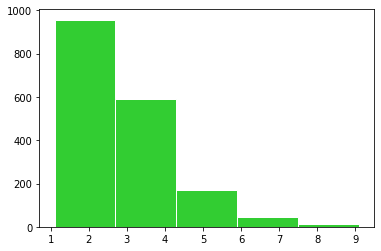

In [16]:
# гистограмма – метод .hist()
# color – цвет заливки, edgecolor – цвет границ столбцов,
# bins – число столбцов (как в выдаче выше),
# grid = False, выключаем координатную сетку

df["diffc"].hist(color = "limegreen", 
                 edgecolor = "white", 
                 bins = 5, 
                 grid = False);

**Примечание.** Точка с запятой в конце строки с кодом (`;`) необязательна. Если этот символ не поставить, гистограмма все равно построится, просто вместе с ней будет выведен «служебный» текст `<AxesSubplot:>`. Так как он обычно не нужен, добавляют `;`, так как этот оператор позволяет вывести только саму картинку.

**Дополнительно.** Если знакомы с другим графиком под названием *ящик с усами* (*box-and-whiskers plot* или *boxplot*), его тоже можно построить через метод `box()` внутри набора графических методов `plot`:

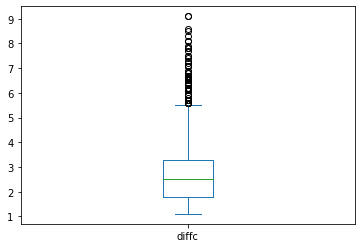

In [17]:
df["diffc"].plot.box();

Если не знакомы с этим графиком, можно почитать [здесь](https://disk.yandex.ru/d/SJ6MdeuYP123PQ).

### Добавление новых столбцов в датафрейм

> Определите максимальное значение сложности статьи. Добавьте в датафрейм столбец с относительной сложностью статьи – сложность статьи в процентах от самой сложной, округленной до сотых.

In [18]:
# вычислим максимум и сохраним как m

m = df["diffc"].max()
print(m)

9.1


In [19]:
# разделим все значения в столбце на m, домножим на 100
# и округлим

df["rel_diffc"] = (df["diffc"] / m * 100).round(2)
df.head()

,title,author,date,diffc,rubrics,text,rel_diffc
0,Температуру ядра Земли уточнили с помощью лазе...,Егор Конюхов,2025-01-03,2.9,"Физика, Геология",Физики уточнили температуру внутренней границы...,31.87
1,Большинство людей эпохи мезолита из Оленеостро...,Михаил Подрезов,2025-01-03,3.1,"Археология, Антропология",Ученые проанализировали изотопный состав строн...,34.07
2,Физики разобрались в состоянии покоя ткани. Он...,Егор Конюхов,2025-01-03,2.3,Физика,"Группа физиков выяснила, что при отсутствии вн...",25.27
3,Виноградины усилили микроволновое поле и помог...,Егор Конюхов,2025-01-06,4.1,Физика,Физики использовали две виноградины для усилен...,45.05
4,Прием глюкокортикоидов при беременности повыси...,Олег Лищук,2025-01-06,1.2,"Медицина, Психология",Кристина Лаугесен (Kristina Laugesen) из Орхус...,13.19


> Добавьте бинарный столбец `hard`, где значения 1 соответствуют новостям с относительной сложностью более 50%, а 0 – всем остальным новостям. Используя полученный столбец, вычислите количество и долю новостей с относительной сложностью выше 50%.

In [20]:
# вспомним про булев столбец из True и False

df["rel_diffc"] > 50

0       False
1       False
2       False
3       False
4       False
        ...  
1772    False
1773    False
1774    False
1775    False
1776    False
Name: rel_diffc, Length: 1777, dtype: bool

In [21]:
# изменим его тип с bool на int,
# добавим в df с названием hard

df["hard"] = (df["rel_diffc"] > 50).astype(int)
df.head()

,title,author,date,diffc,rubrics,text,rel_diffc,hard
0,Температуру ядра Земли уточнили с помощью лазе...,Егор Конюхов,2025-01-03,2.9,"Физика, Геология",Физики уточнили температуру внутренней границы...,31.87,0
1,Большинство людей эпохи мезолита из Оленеостро...,Михаил Подрезов,2025-01-03,3.1,"Археология, Антропология",Ученые проанализировали изотопный состав строн...,34.07,0
2,Физики разобрались в состоянии покоя ткани. Он...,Егор Конюхов,2025-01-03,2.3,Физика,"Группа физиков выяснила, что при отсутствии вн...",25.27,0
3,Виноградины усилили микроволновое поле и помог...,Егор Конюхов,2025-01-06,4.1,Физика,Физики использовали две виноградины для усилен...,45.05,0
4,Прием глюкокортикоидов при беременности повыси...,Олег Лищук,2025-01-06,1.2,"Медицина, Психология",Кристина Лаугесен (Kristina Laugesen) из Орхус...,13.19,0


In [22]:
# так как столбец hard из 0 и 1,
# число единиц – сумма по такому столбцу.
# доля единиц – среднее по такому столбцу

print(df["hard"].sum())
print(df["hard"].mean())

179
0.10073157006190209


> Добавьте столбец `n_rubs` с количеством рубрик, к которым относится статья. Используйте для этого lambda-функцию, которая разбивает строку с рубриками на части и считает их количество.

In [23]:
# сама lambda-функция: на входе – строка, 
# на выходе – число элементов списка после разбиения

lambda x: len(x.split(", "))

<function __main__.<lambda>(x)>

In [24]:
# помещаем функцию в метод .apply(),
# он применит ее ко всем элементам в столбце rubrics

df["n_rubs"] = df["rubrics"].apply(lambda x: len(x.split(", ")))
df.head()

,title,author,date,diffc,rubrics,text,rel_diffc,hard,n_rubs
0,Температуру ядра Земли уточнили с помощью лазе...,Егор Конюхов,2025-01-03,2.9,"Физика, Геология",Физики уточнили температуру внутренней границы...,31.87,0,2
1,Большинство людей эпохи мезолита из Оленеостро...,Михаил Подрезов,2025-01-03,3.1,"Археология, Антропология",Ученые проанализировали изотопный состав строн...,34.07,0,2
2,Физики разобрались в состоянии покоя ткани. Он...,Егор Конюхов,2025-01-03,2.3,Физика,"Группа физиков выяснила, что при отсутствии вн...",25.27,0,1
3,Виноградины усилили микроволновое поле и помог...,Егор Конюхов,2025-01-06,4.1,Физика,Физики использовали две виноградины для усилен...,45.05,0,1
4,Прием глюкокортикоидов при беременности повыси...,Олег Лищук,2025-01-06,1.2,"Медицина, Психология",Кристина Лаугесен (Kristina Laugesen) из Орхус...,13.19,0,2


Вспомним про метод `.value_counts()` и проверим, что за значения в добавленном столбце:

In [25]:
# больше всего новостей с одной рубрикой (их 1235),
# меньше всего – с четырьмя (всего 1)

df["n_rubs"].value_counts()

1    1235
2     485
3      56
4       1
Name: n_rubs, dtype: int64

> По аналогии с предыдущей задачей, добавьте столбцы `author_name` и `author_surname` с именем и фамилией автора соответственно.

In [26]:
# теперь из результата `.split() забираем
# первый и второй элемент соответственно

df["author_name"] = df["author"].apply(lambda x: x.split()[0])
df["author_surname"] = df["author"].apply(lambda x: x.split()[1])
df.head()

,title,author,date,diffc,rubrics,text,rel_diffc,hard,n_rubs,author_name,author_surname
0,Температуру ядра Земли уточнили с помощью лазе...,Егор Конюхов,2025-01-03,2.9,"Физика, Геология",Физики уточнили температуру внутренней границы...,31.87,0,2,Егор,Конюхов
1,Большинство людей эпохи мезолита из Оленеостро...,Михаил Подрезов,2025-01-03,3.1,"Археология, Антропология",Ученые проанализировали изотопный состав строн...,34.07,0,2,Михаил,Подрезов
2,Физики разобрались в состоянии покоя ткани. Он...,Егор Конюхов,2025-01-03,2.3,Физика,"Группа физиков выяснила, что при отсутствии вн...",25.27,0,1,Егор,Конюхов
3,Виноградины усилили микроволновое поле и помог...,Егор Конюхов,2025-01-06,4.1,Физика,Физики использовали две виноградины для усилен...,45.05,0,1,Егор,Конюхов
4,Прием глюкокортикоидов при беременности повыси...,Олег Лищук,2025-01-06,1.2,"Медицина, Психология",Кристина Лаугесен (Kristina Laugesen) из Орхус...,13.19,0,2,Олег,Лищук


**Дополнительно (дополнительно – все до следующего раздела про даты).** В модуле `str` в `pandas` тоже есть свой, «доработанный» метод `.split()`, который можно применять сразу ко всему столбцу:

In [27]:
df["author"].str.split()

0           [Егор, Конюхов]
1        [Михаил, Подрезов]
2           [Егор, Конюхов]
3           [Егор, Конюхов]
4             [Олег, Лищук]
               ...         
1772    [Катерина, Петрова]
1773    [Александр, Войтюк]
1774     [Михаил, Подрезов]
1775     [Михаил, Подрезов]
1776      [Сергей, Коленов]
Name: author, Length: 1777, dtype: object

Как и обычный `.split()`, он возвращает списки, однако здесь списки можно «растянуть» на отдельные столбцы, добавив аргумент `expand = True`:

In [28]:
df["author"].str.split(expand = True)

,0,1
0,Егор,Конюхов
1,Михаил,Подрезов
2,Егор,Конюхов
3,Егор,Конюхов
4,Олег,Лищук
...,...,...
1772,Катерина,Петрова
1773,Александр,Войтюк
1774,Михаил,Подрезов
1775,Михаил,Подрезов


Давайте для примера добавим эти два столбца к `df`, и заодно посмотрим, что происходит в случае, если в датафрейме присутствуют столбцы с абсолютно одинаковыми названиями (имя автора и фамилия в `df` уже есть). Для начала сохраним новый датафрейм из двух столбцов выше в переменную:

In [29]:
df_a = df["author"].str.split(expand = True)
df_a.head()

,0,1
0,Егор,Конюхов
1,Михаил,Подрезов
2,Егор,Конюхов
3,Егор,Конюхов
4,Олег,Лищук


Объединим в новую таблицу `df_full` датафреймы `df` и `df_a` по столбцам, то есть к `df` «доклеим» столбцы из `df_a`. Сделаем это с помощью функции `concat()`:

In [30]:
# по умолчанию axis = 0, это склеивание по строкам, 
# а нам нужно склеивание по столбцам, поэтому axis = 1

df_full = pd.concat([df, df_a], axis = 1)
df_full

,title,author,date,diffc,rubrics,text,rel_diffc,hard,n_rubs,author_name,author_surname,0,1
0,Температуру ядра Земли уточнили с помощью лазе...,Егор Конюхов,2025-01-03,2.9,"Физика, Геология",Физики уточнили температуру внутренней границы...,31.87,0,2,Егор,Конюхов,Егор,Конюхов
1,Большинство людей эпохи мезолита из Оленеостро...,Михаил Подрезов,2025-01-03,3.1,"Археология, Антропология",Ученые проанализировали изотопный состав строн...,34.07,0,2,Михаил,Подрезов,Михаил,Подрезов
2,Физики разобрались в состоянии покоя ткани. Он...,Егор Конюхов,2025-01-03,2.3,Физика,"Группа физиков выяснила, что при отсутствии вн...",25.27,0,1,Егор,Конюхов,Егор,Конюхов
3,Виноградины усилили микроволновое поле и помог...,Егор Конюхов,2025-01-06,4.1,Физика,Физики использовали две виноградины для усилен...,45.05,0,1,Егор,Конюхов,Егор,Конюхов
4,Прием глюкокортикоидов при беременности повыси...,Олег Лищук,2025-01-06,1.2,"Медицина, Психология",Кристина Лаугесен (Kristina Laugesen) из Орхус...,13.19,0,2,Олег,Лищук,Олег,Лищук
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,Нападки сородичей в детстве улучшили когнитивн...,Катерина Петрова,2025-11-19,2.1,Зоология,Когнитивные способности ворон-свистунов завися...,23.08,0,1,Катерина,Петрова,Катерина,Петрова
1773,Затемнение далекой звезды объяснили прохождени...,Александр Войтюк,2025-11-19,4.2,Астрономия,Астрономы объяснили затемнение звезды ASASSN-2...,46.15,0,1,Александр,Войтюк,Александр,Войтюк
1774,В Чехии нашли гальку с выгравированными в верх...,Михаил Подрезов,2025-11-19,3.1,Археология,Археологи обнаружили в окрестностях чешской Ос...,34.07,0,1,Михаил,Подрезов,Михаил,Подрезов
1775,Ценный пурпур подделали в римское время. Краск...,Михаил Подрезов,2025-11-20,1.3,Археология,На Древнем Востоке подделывали пурпур — самый ...,14.29,0,1,Михаил,Подрезов,Михаил,Подрезов


Сейчас столбцы-дубликаты с именем и фамилией автора называются 0 и 1. Любопытный вопрос: позволит ли `pandas` переименовать столбцы таким образом, чтобы у некоторых столбцов были одинаковые названия? Применим метод `.rename()` и подадим на вход аргументу `columns` словарь соответствий *старое название-новое название*:

In [31]:
# inplace = True: сохраняем изменения

df_full.rename(columns = {0 : "author_name", 
                          1 : "author_surname"}, inplace = True)
df_full.head()

,title,author,date,diffc,rubrics,text,rel_diffc,hard,n_rubs,author_name,author_surname,author_name,author_surname
0,Температуру ядра Земли уточнили с помощью лазе...,Егор Конюхов,2025-01-03,2.9,"Физика, Геология",Физики уточнили температуру внутренней границы...,31.87,0,2,Егор,Конюхов,Егор,Конюхов
1,Большинство людей эпохи мезолита из Оленеостро...,Михаил Подрезов,2025-01-03,3.1,"Археология, Антропология",Ученые проанализировали изотопный состав строн...,34.07,0,2,Михаил,Подрезов,Михаил,Подрезов
2,Физики разобрались в состоянии покоя ткани. Он...,Егор Конюхов,2025-01-03,2.3,Физика,"Группа физиков выяснила, что при отсутствии вн...",25.27,0,1,Егор,Конюхов,Егор,Конюхов
3,Виноградины усилили микроволновое поле и помог...,Егор Конюхов,2025-01-06,4.1,Физика,Физики использовали две виноградины для усилен...,45.05,0,1,Егор,Конюхов,Егор,Конюхов
4,Прием глюкокортикоидов при беременности повыси...,Олег Лищук,2025-01-06,1.2,"Медицина, Психология",Кристина Лаугесен (Kristina Laugesen) из Орхус...,13.19,0,2,Олег,Лищук,Олег,Лищук


Раз код сработал, значит `pandas` позволил :) Действительно, теперь в `df_full` у нас два столбца с одинаковыми названиями. Теперь если запросим столбец `author_name`, выбраны будут оба:

In [32]:
df_full["author_name"]

,author_name,author_name
0,Егор,Егор
1,Михаил,Михаил
2,Егор,Егор
3,Егор,Егор
4,Олег,Олег
...,...,...
1772,Катерина,Катерина
1773,Александр,Александр
1774,Михаил,Михаил
1775,Михаил,Михаил


Непорядок! Однако убрать дубликаты среди столбцов несколько сложнее, чем убрать дубликаты среди строк. Чтобы это сделать, придется раньше времени познакомиться с методом `.loc`. Метод `.loc` (от *location*) используется для выбора значений датафрейма по индексам строк и названиям столбцов. Так как метод используется для фильтрации, скобки после него ставятся не круглые, а квадратные, как было в случае фильтров. На первом месте в квадратных скобках указывается индекс строки, на втором – название столбца:

In [33]:
# строка с индексом 10, столбец author

df_full.loc[10, "author"]

'Егор Конюхов'

На первом месте может быть не одиночный индекс, а список индексов:

In [34]:
df_full.loc[[10, 13], "author"]

10        Егор Конюхов
13    Николай Воронцов
Name: author, dtype: object

Или срез:

In [35]:
df_full.loc[10:13, "author"]

10        Егор Конюхов
11        Егор Конюхов
12        Егор Конюхов
13    Николай Воронцов
Name: author, dtype: object

Если мы опустим границы среза на первом месте, мы получим просто столбец `author` целиком, потому что строки будут выбраны все:

In [36]:
df_full.loc[:, "author"]

0           Егор Конюхов
1        Михаил Подрезов
2           Егор Конюхов
3           Егор Конюхов
4             Олег Лищук
              ...       
1772    Катерина Петрова
1773    Александр Войтюк
1774     Михаил Подрезов
1775     Михаил Подрезов
1776      Сергей Коленов
Name: author, Length: 1777, dtype: object

Теперь вернемся к исходной задаче. Нам нужно избавиться от дубликатов – столбцов с повторяющимися названиями. Воспользуемся методом `.duplicated()`, который можно применить к перечню названий столбцов:

In [37]:
print(df_full.columns)

Index(['title', 'author', 'date', 'diffc', 'rubrics', 'text', 'rel_diffc',
       'hard', 'n_rubs', 'author_name', 'author_surname', 'author_name',
       'author_surname'],
      dtype='object')


In [38]:
print(df_full.columns.duplicated())

[False False False False False False False False False False False  True
  True]


Этот метод возвращает `False` для всех названий, которые при переборе перечня встретились в первый раз, и значение `True` – для тех, которые встретились второй раз и более. Получается, для первого `author_name` возвращается `False` (не дубликат), а для второго `author_name`  – уже `True` (дубликат, поскольку такое значение ранее было). Чтобы выбрать все, что НЕ является дубликатом, надо добавить отрицание и посместить результат в `.loc[]` на второе место, соответствующее фильтру на столбцы:

In [39]:
# все, что надо выбрать – True

print(~df_full.columns.duplicated())

[ True  True  True  True  True  True  True  True  True  True  True False
 False]


In [40]:
# справились

df_full = df_full.loc[:, ~df_full.columns.duplicated()]
df_full.head()

,title,author,date,diffc,rubrics,text,rel_diffc,hard,n_rubs,author_name,author_surname
0,Температуру ядра Земли уточнили с помощью лазе...,Егор Конюхов,2025-01-03,2.9,"Физика, Геология",Физики уточнили температуру внутренней границы...,31.87,0,2,Егор,Конюхов
1,Большинство людей эпохи мезолита из Оленеостро...,Михаил Подрезов,2025-01-03,3.1,"Археология, Антропология",Ученые проанализировали изотопный состав строн...,34.07,0,2,Михаил,Подрезов
2,Физики разобрались в состоянии покоя ткани. Он...,Егор Конюхов,2025-01-03,2.3,Физика,"Группа физиков выяснила, что при отсутствии вн...",25.27,0,1,Егор,Конюхов
3,Виноградины усилили микроволновое поле и помог...,Егор Конюхов,2025-01-06,4.1,Физика,Физики использовали две виноградины для усилен...,45.05,0,1,Егор,Конюхов
4,Прием глюкокортикоидов при беременности повыси...,Олег Лищук,2025-01-06,1.2,"Медицина, Психология",Кристина Лаугесен (Kristina Laugesen) из Орхус...,13.19,0,2,Олег,Лищук


### Формат дата-время и добавление новых столбцов

Вспомним про описание всего датафрейма и посмотрим на типы столбцов:

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1777 non-null   object 
 1   author          1777 non-null   object 
 2   date            1777 non-null   object 
 3   diffc           1777 non-null   float64
 4   rubrics         1777 non-null   object 
 5   text            1777 non-null   object 
 6   rel_diffc       1777 non-null   float64
 7   hard            1777 non-null   int64  
 8   n_rubs          1777 non-null   int64  
 9   author_name     1777 non-null   object 
 10  author_surname  1777 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 152.8+ KB


Столбец с датой пока имеет текстовый тип, а значит, мы не сможем работать с датами полноценно. Рассмотрим разные способы изменения типа столбца:

In [42]:
# вариант 1 – не универсальный
# подходит только если дата в формате ГГГГ-ММ-ДД,
# год-месяц-день

df["date"] = df["date"].astype("datetime64[ns]")

In [43]:
# вариант 2 – универсальный

df["date"] = pd.to_datetime(df["date"], format = "%Y-%m-%d")

В данном случае шаблон `%Y-%m-%d` описывает формат даты, представленный в данных, например, `2025-01-03`):

* `%Y`: сюда подставляется год из 4 цифр (`%y`, если год был бы из двух цифр, например, 25);
* `%m`: сюда подставляется месяц в виде числа;
* `%d`: сюда подставляется день (число месяца);
* все части разделены дефисами, а не `/` или пробелами.

Про форматирование дат, которое указывается в `format`, можно почитать [здесь](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior), оно относится не только к датам в `pandas`, а к датам вообще, не только в Python. 

Проверим, что теперь у столбца с датой корректный тип:

In [ ]:
df.info()

Раз тип корректный, из даты формата `datetime` можно извлекать отдельные части:

In [44]:
# год в виде целого числа

print(df["date"].dt.year)

0       2025
1       2025
2       2025
3       2025
4       2025
        ... 
1772    2025
1773    2025
1774    2025
1775    2025
1776    2025
Name: date, Length: 1777, dtype: int64


In [45]:
# месяц в виде целого числа

print(df["date"].dt.month)

0        1
1        1
2        1
3        1
4        1
        ..
1772    11
1773    11
1774    11
1775    11
1776    11
Name: date, Length: 1777, dtype: int64


In [46]:
# день в виде целого числа

print(df["date"].dt.day)

0        3
1        3
2        3
3        6
4        6
        ..
1772    19
1773    19
1774    19
1775    20
1776    20
Name: date, Length: 1777, dtype: int64


> Подумайте, как могут называться атрибуты/методы для извлечения дня недели, квартала, а также часов, минут и секунд (если их в дате нет, это не помеха).

In [47]:
# номер для недели, от 0 до 6

print(df["date"].dt.weekday)

0       4
1       4
2       4
3       0
4       0
       ..
1772    2
1773    2
1774    2
1775    3
1776    3
Name: date, Length: 1777, dtype: int64


In [48]:
# название для недели

print(df["date"].dt.day_name())

0          Friday
1          Friday
2          Friday
3          Monday
4          Monday
          ...    
1772    Wednesday
1773    Wednesday
1774    Wednesday
1775     Thursday
1776     Thursday
Name: date, Length: 1777, dtype: object


In [49]:
# номер квартала от 1 до 4

print(df["date"].dt.quarter)

0       1
1       1
2       1
3       1
4       1
       ..
1772    4
1773    4
1774    4
1775    4
1776    4
Name: date, Length: 1777, dtype: int64


In [50]:
# часы, минуты, секунды, 
# раз в дате их не было, везде автоматически 0

print(df["date"].dt.hour)
print(df["date"].dt.minute)

0       0
1       0
2       0
3       0
4       0
       ..
1772    0
1773    0
1774    0
1775    0
1776    0
Name: date, Length: 1777, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
1772    0
1773    0
1774    0
1775    0
1776    0
Name: date, Length: 1777, dtype: int64


> Переименуйте значения с днями недели таким образом, чтобы они были написаны на русском языке. Используйте для этого метод `.map()` для столбца датафрейма и словарь с соответствиями *старое название-новое название*.

In [51]:
df["weekday"] = df["date"].dt.day_name()
df["weekday"] = df["weekday"].map({"Monday" : "понедельник", 
                   "Tuesday" : "вторник", 
                   "Wednesday" : "среда", 
                   "Thursday" : "четверг", 
                   "Friday" : "пятница", 
                   "Saturday" : "суббота", 
                   "Sunday" : "воскресенье", 
                  })

df.head()

,title,author,date,diffc,rubrics,text,rel_diffc,hard,n_rubs,author_name,author_surname,weekday
0,Температуру ядра Земли уточнили с помощью лазе...,Егор Конюхов,2025-01-03,2.9,"Физика, Геология",Физики уточнили температуру внутренней границы...,31.87,0,2,Егор,Конюхов,пятница
1,Большинство людей эпохи мезолита из Оленеостро...,Михаил Подрезов,2025-01-03,3.1,"Археология, Антропология",Ученые проанализировали изотопный состав строн...,34.07,0,2,Михаил,Подрезов,пятница
2,Физики разобрались в состоянии покоя ткани. Он...,Егор Конюхов,2025-01-03,2.3,Физика,"Группа физиков выяснила, что при отсутствии вн...",25.27,0,1,Егор,Конюхов,пятница
3,Виноградины усилили микроволновое поле и помог...,Егор Конюхов,2025-01-06,4.1,Физика,Физики использовали две виноградины для усилен...,45.05,0,1,Егор,Конюхов,понедельник
4,Прием глюкокортикоидов при беременности повыси...,Олег Лищук,2025-01-06,1.2,"Медицина, Психология",Кристина Лаугесен (Kristina Laugesen) из Орхус...,13.19,0,2,Олег,Лищук,понедельник


### Описание данных: текстовые данные

> Постройте таблицу частот для столбца с днями недели. Изучите аргументы соответствующего метода через `help()`.

In [52]:
df["weekday"].value_counts()

пятница        380
среда          359
четверг        354
понедельник    351
вторник        318
суббота         12
воскресенье      3
Name: weekday, dtype: int64

In [53]:
# аргумент normalize – для долей от 0 до 1

df["weekday"].value_counts(normalize = True)

пятница        0.213844
среда          0.202026
четверг        0.199212
понедельник    0.197524
вторник        0.178953
суббота        0.006753
воскресенье    0.001688
Name: weekday, dtype: float64

In [54]:
# если хотим проценты – надо домножить на 100

df["weekday"].value_counts(normalize = True) * 100

пятница        21.384356
среда          20.202589
четверг        19.921216
понедельник    19.752392
вторник        17.895329
суббота         0.675295
воскресенье     0.168824
Name: weekday, dtype: float64

> Определите моду столбца с днями недели – самое частое значение. Используйте метод `.mode()`. Как вы думаете, почему результатом является столбец типа `pandas Series`, а не отдельное значение.

In [55]:
df["weekday"].mode()

0    пятница
dtype: object

**Ответ.** Так как теоретически мод может быть несколько (два значения самых частых, встречаются одинаковое число раз), метод `.mode()` возвращает результат в виде столбца, который потенциально может содержать несколько значений. Если мода единственная, значение можно просто забрать по индексу 0:

In [56]:
df["weekday"].mode()[0]

'пятница'

> Используя полученную таблицу частот, постройте столбиковую диаграмму для распределения новостей по дням недели, применив к результату `value_counts()` метод `plot.bar()`.

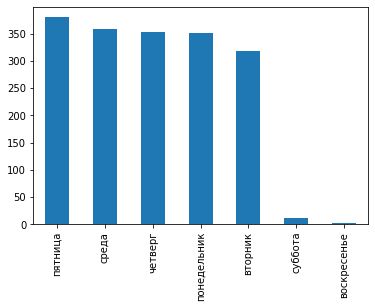

In [57]:
df["weekday"].value_counts().plot.bar();

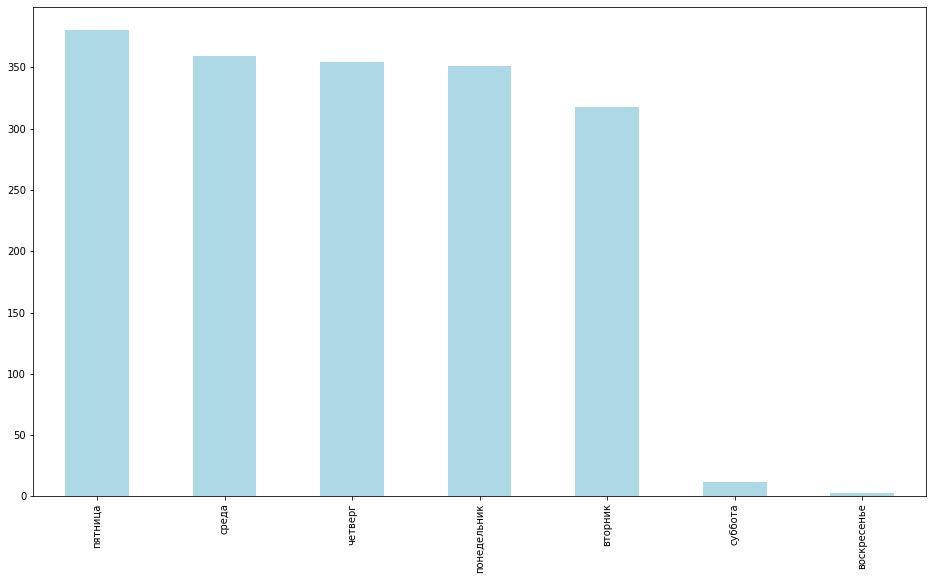

In [58]:
# увеличим размер графика до формата 16 на 9 дюймов,
# изменим цвет

df["weekday"].value_counts().plot.bar(figsize = (16, 9),
                                      color = "lightblue");

В отличие от гистограммы, где цвет отдельных столбцов не настраивается (содержательно бессмысленно, так как там нет категорий, есть разбиение одного и того же показателя на отрезки), здесь можно установить цвет для каждого столбца. При этом, если в `color` вписать список цветов, чья длина не совпадает с числом столбцов, ошибки не будет, цвета будут чередоваться:

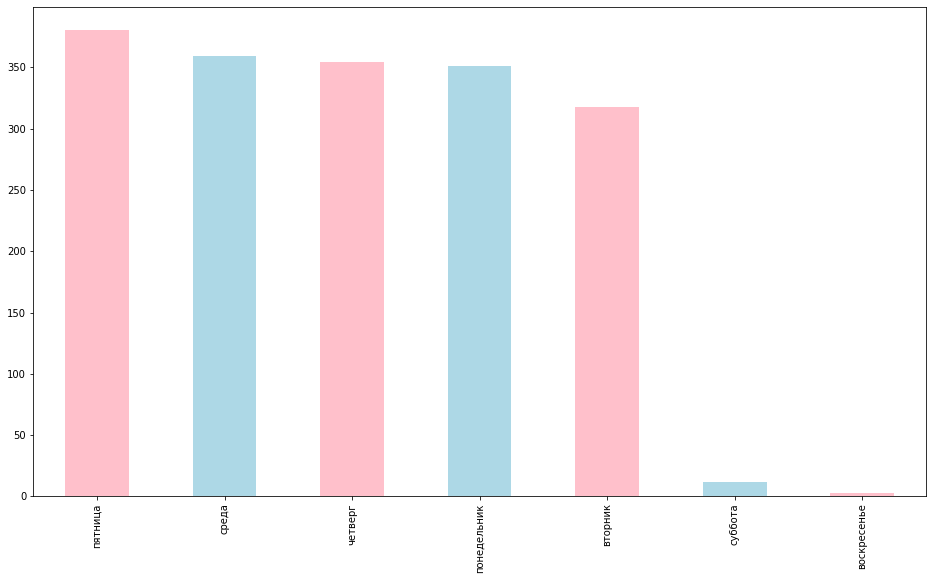

In [59]:
df["weekday"].value_counts().plot.bar(figsize = (16, 9),
                                      color = ["pink", "lightblue"]);

**Дополнительно.** Немного изменим задачу. Представим, что нам нужна столбиковая диаграмма, однако столбцы в ней должны быть расположены не по убыванию частоты, а хронологически – от понедельника к воскресенью. Так как сортировка по алфавиту в данном случае ничего не даст, применим метод `.value_counts()` не к столбцу с названием дня недели, а к номеру дня недели, который можно забрать из `date`:

In [60]:
df["date"].dt.weekday.value_counts()

4    380
2    359
3    354
0    351
1    318
5     12
6      3
Name: date, dtype: int64

Так как в данном случае отсортировать столбец нам нужно не по значениям (частоты `.values`), а по индексам строк (`.index`), задействуем метод `.sort_index()`:

In [61]:
tab = df["date"].dt.weekday.value_counts().sort_index()
tab

0    351
1    318
2    359
3    354
4    380
5     12
6      3
Name: date, dtype: int64

Построим столбиковую диаграмму:

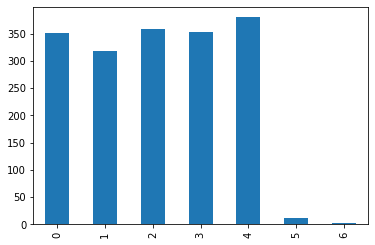

In [62]:
tab.plot.bar();

Список цветов можем составить хитрым образом – за будними днями закрепим темно-синий цвет `navy`, а за выходными – малиновый `crimson`, при этом повторять названия несколько раз мы не будем, воспользуемся свойством умножения списка на число:

In [63]:
["navy"] * 5 + ["crimson"] * 2

['navy', 'navy', 'navy', 'navy', 'navy', 'crimson', 'crimson']

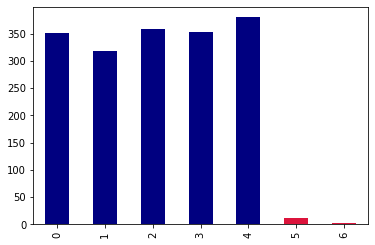

In [64]:
tab.plot.bar(color = ["navy"] * 5 + ["crimson"] * 2);

Чтобы изменить подписи к графику (названия столбца), проще всего изменить исходную таблицу `tab`. 
Перепишем индексы:

In [65]:
tab.index = ["понедельник", "вторник", "среда", "четверг", 
             "пятница", "суббота", "воскресенье"]
tab

понедельник    351
вторник        318
среда          359
четверг        354
пятница        380
суббота         12
воскресенье      3
Name: date, dtype: int64

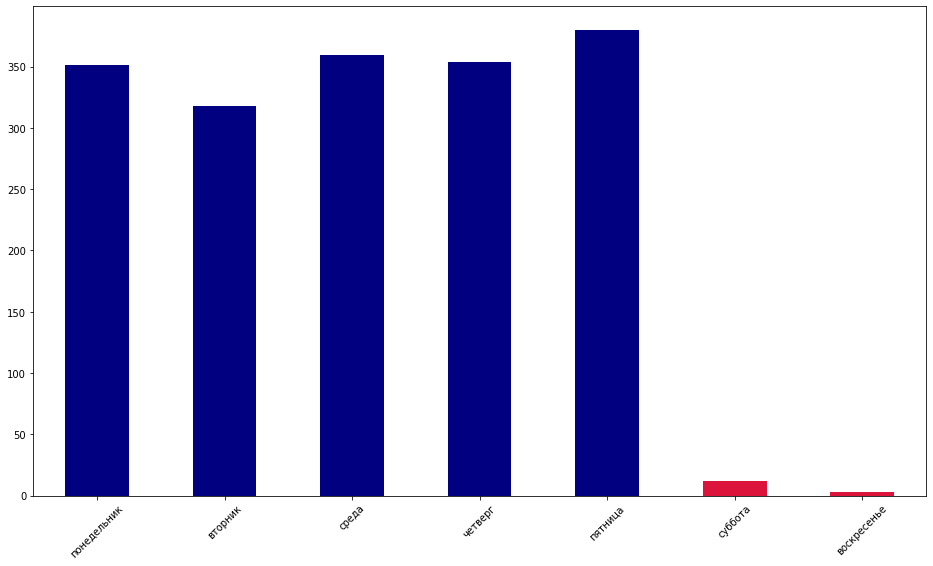

In [66]:
tab.plot.bar(figsize = (16, 9), 
             color = ["navy"] * 5 + ["crimson"] * 2, 
             rot = 45);

Про графики еще немного поговорим в следующий раз, для полноценной работы одной библиотеки `pandas` не хватит. Библиотека `pandas` зависит от графической библиотеки `matplotlib`, поэтому в ней определены методы для построения основных графиков. Однако для более аккуратного оформления графиков (заголовки, подписи, настройка шрифтов, изменение разрешения картинки и выгрузка в файл) потребуется импорт `matplotlib` и знакомство с устройством ее объектов и методов на них.

**Очень дополнительно.** Постройте таблицу частот для столбца с рубриками. Согласитесь, что тут всё гораздо сложнее. Давайте попробуем разобраться!

In [67]:
# тут готовый семинар заканчивается и начинается взрослая жизнь
# решила сделать часть все же дополнительной

Таблица частот для рубрик выглядит громоздко:

In [68]:
df["rubrics"].value_counts()

Медицина                             402
Археология                           152
Зоология                             146
Астрономия                           108
Экология и климат                     92
                                    ... 
Медицина, Биология, Материалы          1
Медицина, Психология, Лингвистика      1
Космонавтика, Роботы и дроны           1
Медицина, Психология, IT               1
Биология, Палеонтология                1
Name: rubrics, Length: 166, dtype: int64

В ней целых 166 рубрик (`Length: 166`) за счет того, что одна новость может относиться к нескольким рубрикам – тогда рубрики перечисляются через запятую с пробелом. Чтобы получить значения рубрик по отдельности, для начала нужно рубрики разбить на части. Сохраним индексы из таблицы выше в переменную `names`:

In [69]:
freqs = df["rubrics"].value_counts()

names = freqs.index
print(len(names)) # их 166

166


Вспомним про функцию `map()` и с ее помощью применим метод `.split()` ко всем элементам в `names`:

In [70]:
names_nested = list(map(lambda x: x.split(", "), names))
print(names_nested)

[['Медицина'], ['Археология'], ['Зоология'], ['Астрономия'], ['Экология и климат'], ['Антропология', 'Археология'], ['Физика'], ['Роботы и дроны'], ['Зоология', 'Экология и климат'], ['Химия'], ['Космонавтика'], ['Медицина', 'Психология'], ['Психология', 'Медицина'], ['Палеонтология'], ['Медицина', 'Биология'], ['Археология', 'Антропология'], ['Биология'], ['Археология', 'Зоология'], ['Биология', 'Медицина'], ['Физика', 'Астрономия'], ['Антропология'], ['Археология', 'История'], ['Медицина', 'Гаджеты'], ['Медицина', 'Социология'], ['Медицина', 'Экология и климат'], ['Психология'], ['Медицина', 'IT'], ['Авиация'], ['Астрономия', 'Геология'], ['Геология'], ['Медицина', 'Зоология'], ['Палеонтология', 'Зоология'], ['Медицина', 'Технологии'], ['Экология и климат', 'Зоология'], ['Археология', 'Ботаника'], ['Социология', 'Психология', 'Медицина'], ['IT'], ['Экология и климат', 'Медицина'], ['Антропология', 'Археология', 'История'], ['Зоология', 'Палеонтология'], ['Ботаника', 'Экология и клима

Теперь в `names_nested` у нас списки из слов. Задача – получить на основе этого большого списка из вложенных списков список из отдельных слов, то есть «распаковать» каждый маленький список на элементы. С помощью цикла `for` это сделать несложно, но давайте рассмотрим более хитрый метод. Чтобы понять, как этот метод работает, вспомним два факта:

* как работает операция сложения через `+` на двух списках;
* как работает функция `sum()`.

С операцией `+` все просто – она склеивает два списка, приписывая элементы второго в конец первого:

In [71]:
[1, 2, 7] + [8, 10]

[1, 2, 7, 8, 10]

С функцией `sum()` все тоже просто – она вычисляет сумму элементов последовательности, поданной на вход:

In [72]:
sum([1, 4, 5])

10

Однако тут есть нюанс: у функции `sum()` есть дополнительный аргумент, в который можно записать стартовое значение:

In [73]:
# просуммировать 1, 2, 3, но в самом начале добавить 5,
# то есть вычислить 5 + 1 + 2 + 3

sum([1, 2, 3], 5)

11

Если воспользоваться этим аргументом и тем фактом, что операция сложения через `+` доступна для списков, можно получить любопытный результат:

In [ ]:
# показываем, что нам нужно сложение списков,
# записывая в стартовый элемент пустой список [],
# получается [] + [1, 2, 7] + [10, 20]

sum([[1, 2, 7], [10, 20]], [])

Этот любопытный результат позволяет легко решить поставленную задачу – «распаковать» и сложить в единый список все названия в `names_nested`:

In [74]:
print(sum(names_nested, []))

['Медицина', 'Археология', 'Зоология', 'Астрономия', 'Экология и климат', 'Антропология', 'Археология', 'Физика', 'Роботы и дроны', 'Зоология', 'Экология и климат', 'Химия', 'Космонавтика', 'Медицина', 'Психология', 'Психология', 'Медицина', 'Палеонтология', 'Медицина', 'Биология', 'Археология', 'Антропология', 'Биология', 'Археология', 'Зоология', 'Биология', 'Медицина', 'Физика', 'Астрономия', 'Антропология', 'Археология', 'История', 'Медицина', 'Гаджеты', 'Медицина', 'Социология', 'Медицина', 'Экология и климат', 'Психология', 'Медицина', 'IT', 'Авиация', 'Астрономия', 'Геология', 'Геология', 'Медицина', 'Зоология', 'Палеонтология', 'Зоология', 'Медицина', 'Технологии', 'Экология и климат', 'Зоология', 'Археология', 'Ботаника', 'Социология', 'Психология', 'Медицина', 'IT', 'Экология и климат', 'Медицина', 'Антропология', 'Археология', 'История', 'Зоология', 'Палеонтология', 'Ботаника', 'Экология и климат', 'Ботаника', 'Физика', 'Биология', 'Авиация', 'Транспорт', 'Психология', 'IT',

Из такого списка легко убрать дубликаты – превратим его в множество, а затем – в список, отсортированный по алфавиту:

In [75]:
rubrics = sorted(set(sum(names_nested, [])))
print(rubrics)
print(len(rubrics))

['3D-печать', 'IT', 'Авиация', 'Антропология', 'Археология', 'Астрономия', 'Биология', 'Ботаника', 'Гаджеты', 'Геология', 'Зоология', 'Игры', 'Инфопартнерство', 'История', 'Космонавтика', 'Лингвистика', 'Математика', 'Материалы', 'Медицина', 'Мезонин', 'Наука', 'Палеонтология', 'Психология', 'Роботы и дроны', 'Связь', 'Социология', 'Технологии', 'Транспорт', 'Физика', 'Химия', 'Экология и климат', 'Экономика']
32


Список уникальных рубрик оказался не таким уж и большим – 32 элемента. Теперь можем перебрать все элементы в `rubrics` и посчитать, сколько раз каждое название встречается в таблице частот `freqs`:

In [76]:
freqs

Медицина                             402
Археология                           152
Зоология                             146
Астрономия                           108
Экология и климат                     92
                                    ... 
Медицина, Биология, Материалы          1
Медицина, Психология, Лингвистика      1
Космонавтика, Роботы и дроны           1
Медицина, Психология, IT               1
Биология, Палеонтология                1
Name: rubrics, Length: 166, dtype: int64

Мы уже обсуждали, что объект выше – последовательность `pandas Series` – очень похожа на словарь. Поэтому ее можно превратить в словарь, чтобы сделать возможным перебор пар *ключ-значение*.

In [77]:
print(dict(freqs))

{'Медицина': 402, 'Археология': 152, 'Зоология': 146, 'Астрономия': 108, 'Экология и климат': 92, 'Антропология, Археология': 76, 'Физика': 67, 'Роботы и дроны': 65, 'Зоология, Экология и климат': 64, 'Химия': 60, 'Космонавтика': 52, 'Медицина, Психология': 44, 'Психология, Медицина': 32, 'Палеонтология': 20, 'Медицина, Биология': 20, 'Археология, Антропология': 19, 'Биология': 14, 'Археология, Зоология': 12, 'Биология, Медицина': 12, 'Физика, Астрономия': 11, 'Антропология': 11, 'Археология, История': 11, 'Медицина, Гаджеты': 10, 'Медицина, Социология': 9, 'Медицина, Экология и климат': 9, 'Психология': 9, 'Медицина, IT': 8, 'Авиация': 7, 'Астрономия, Геология': 7, 'Геология': 7, 'Медицина, Зоология': 7, 'Палеонтология, Зоология': 7, 'Медицина, Технологии': 7, 'Экология и климат, Зоология': 6, 'Археология, Ботаника': 5, 'Социология, Психология, Медицина': 5, 'IT': 5, 'Экология и климат, Медицина': 4, 'Антропология, Археология, История': 4, 'Зоология, Палеонтология': 4, 'Ботаника, Экол

Напишем программу:

* определим словарь `new_counts`, в нем будут сохранены уникальные рубрики из `rubrics` (которых 32) и число раз, которое они упоминаются в индексах-ключах `freqs`;
* пройдем в цикле по всем уникальным рубрикам в `rubrics`, и для каждой рубрики `rub` сначала будем добавлять в `new_counts` записи с ключом в виде названия рубрики и значением 0, а затем – проходить в цикле по всем записям в `freqs` и проверять, входит ли название `rub` в индексы столбца `freqs`; в случае положительного ответа соответствующее рубрике `rub` значение будем увеличивать на 1.

In [78]:
new_counts = {}

for rub in rubrics:
    new_counts[rub] = 0
    for k, v in dict(freqs).items():
        if rub in k:
            new_counts[rub] += v
            
print(new_counts)

{'3D-печать': 2, 'IT': 32, 'Авиация': 13, 'Антропология': 123, 'Археология': 296, 'Астрономия': 131, 'Биология': 73, 'Ботаника': 25, 'Гаджеты': 21, 'Геология': 17, 'Зоология': 278, 'Игры': 1, 'Инфопартнерство': 1, 'История': 29, 'Космонавтика': 56, 'Лингвистика': 6, 'Математика': 3, 'Материалы': 6, 'Медицина': 611, 'Мезонин': 6, 'Наука': 2, 'Палеонтология': 38, 'Психология': 124, 'Роботы и дроны': 70, 'Связь': 2, 'Социология': 27, 'Технологии': 15, 'Транспорт': 6, 'Физика': 92, 'Химия': 70, 'Экология и климат': 199, 'Экономика': 2}


Ура! Теперь из словаря соберем последовательность `pandas` и построим график: 

In [79]:
pd.Series(new_counts).sort_values(ascending = False)

Медицина             611
Археология           296
Зоология             278
Экология и климат    199
Астрономия           131
Психология           124
Антропология         123
Физика                92
Биология              73
Роботы и дроны        70
Химия                 70
Космонавтика          56
Палеонтология         38
IT                    32
История               29
Социология            27
Ботаника              25
Гаджеты               21
Геология              17
Технологии            15
Авиация               13
Лингвистика            6
Материалы              6
Мезонин                6
Транспорт              6
Математика             3
3D-печать              2
Связь                  2
Наука                  2
Экономика              2
Инфопартнерство        1
Игры                   1
dtype: int64

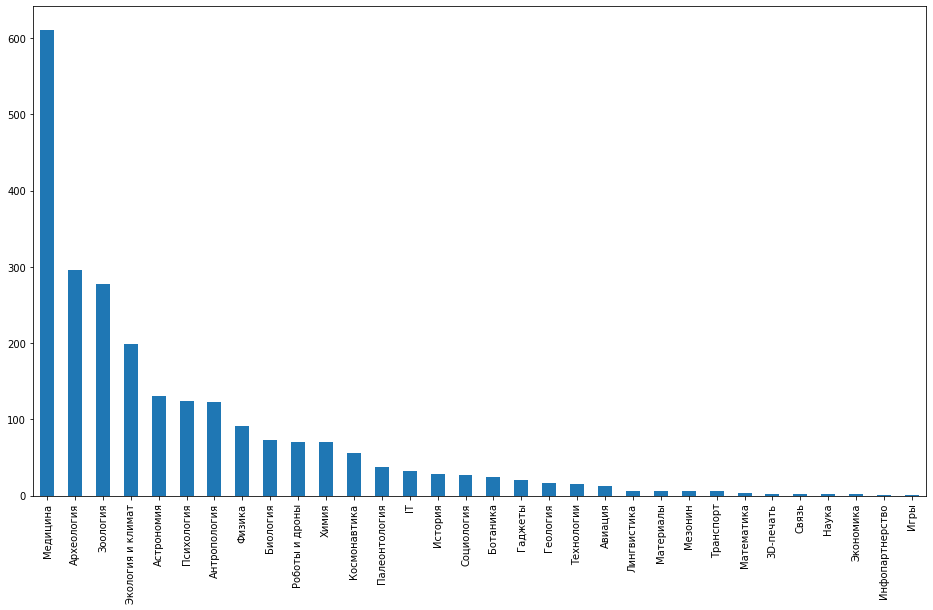

In [80]:
pd.Series(new_counts).sort_values(ascending = False).plot.bar(figsize = (16, 9));